# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Image dimensions: 32x32x3
Number of classes: 100


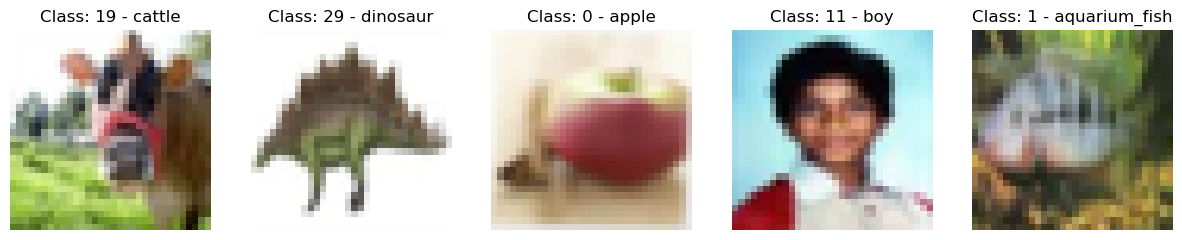

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Printing shape of the training and test sets
print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')

# Checking images dimensions
img_height, img_width, img_channels = x_train.shape[1:]
print(f'Image dimensions: {img_height}x{img_width}x{img_channels}')

# Checking number of classes
num_classes = len(np.unique(y_train))
print(f'Number of classes: {num_classes}')

#defining label names per CIFAR-100 dataset website
fine_label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]


# Showing 5  examples from the training set
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(x_train[i])
    class_index = y_train[i][0]
    axes[i].set_title(f'Class: {class_index} - {fine_label_names[class_index]}')
    axes[i].axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalizing the images using Keras ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

x_train = datagen.standardize(x_train.astype('float32'))
x_test = datagen.standardize(x_test.astype('float32'))

# Converting labels to one-hot encoded vectors
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Spliting training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f'Training data shape: {x_train.shape}')
print(f'Validation data shape: {x_val.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Validation labels shape: {y_val.shape}')
print(f'Test labels shape: {y_test.shape}')

Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Creating Sequential model
model = Sequential()

# Adding convolutional layers with different filter sizes and numbers
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening output
model.add(Flatten())

# Adding dense layers
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))  # 100 classes in CIFAR-100

#  model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

### Answer 2b:
Loss function: **categorical_crossentropy**. I chose this because it is suitable for multi-class classification problems where labels are one-hot encoded. It measures the performance of a classification model and the output is a probability value for each class.

Optimizer: **Adam**. Adam (Adaptive Moment Estimation) is efficient and commonly used as it adapts learning rates for each parameter. I used a learning rate of **0.001** which is a common starting point for these tasks.

Metrics: **accuracy** to start with

In [5]:
from keras import optimizers
from keras.optimizers import Adam

# Compiling the model using CATEGORICAL CROSSENTROPY for loss function and ADAM optimizer with learning rate 0.001
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

### Answer 3a:
I originally trained the model on 20 epochs but noticed that after epoch 10 the trainin loss kept decreasing but the validation loss started to increase, reaching a validation loss at epoch 20 even higher than the starting epoch (epoch 1 val loss = 3.6143. epoch 10 val loss= 2.8113. epoch 20 val loss= 4.4453) and no improvements in validation accuracy were happening. On this run the model accuracy and validation accuracy reached 52% and 32% respectively at epoch 10 and 75% and 30% at apoch 20 respectively. 
I then proceeded to retrain the model with 10 epochs to avoid overfittting per below. 

In [6]:
# Train the model
history = model.fit(
    x_train, 
    y_train,
    epochs=10,  # Originally ran 20 epochs but re-ran with 10 epochs
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=2 
)


Epoch 1/10
1250/1250 - 125s - loss: 3.9447 - accuracy: 0.0937 - val_loss: 3.5690 - val_accuracy: 0.1445 - 125s/epoch - 100ms/step
Epoch 2/10
1250/1250 - 143s - loss: 3.2822 - accuracy: 0.2049 - val_loss: 3.1347 - val_accuracy: 0.2296 - 143s/epoch - 114ms/step
Epoch 3/10
1250/1250 - 132s - loss: 2.9556 - accuracy: 0.2658 - val_loss: 2.9409 - val_accuracy: 0.2725 - 132s/epoch - 105ms/step
Epoch 4/10
1250/1250 - 133s - loss: 2.7069 - accuracy: 0.3139 - val_loss: 2.8514 - val_accuracy: 0.2890 - 133s/epoch - 107ms/step
Epoch 5/10
1250/1250 - 131s - loss: 2.5024 - accuracy: 0.3554 - val_loss: 2.7460 - val_accuracy: 0.3113 - 131s/epoch - 105ms/step
Epoch 6/10
1250/1250 - 137s - loss: 2.3206 - accuracy: 0.3939 - val_loss: 2.7984 - val_accuracy: 0.3141 - 137s/epoch - 110ms/step
Epoch 7/10
1250/1250 - 132s - loss: 2.1514 - accuracy: 0.4308 - val_loss: 2.7325 - val_accuracy: 0.3266 - 132s/epoch - 105ms/step
Epoch 8/10
1250/1250 - 125s - loss: 1.9987 - accuracy: 0.4634 - val_loss: 2.8176 - val_acc

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

### Answer 3b:

**Accuracy:** 0.3294

**Other Metrics:** Loss and Precision

**Reason for Selection:** <br> **Loss**: measures how well the model's predictions match the actual labels. A lower loss indicates better model performance in terms of prediction error. <br> **Precision**: measures the proportion of true positive predictions among all positive predictions, which helps assess the model's ability to correctly identify positive cases 

**Value of Metrics:** Loss: 2.9910 - Precision: 0.3378

**Interpretation of the Metrics:** <br> **Loss**: The loss is high,suggesting that the model is not performing well and may require further tuning. <br> **Precision**: Precision is also low meaning high false positives, suggesting low reliability of the model's predictions.

In [7]:
from sklearn.metrics import precision_score
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Report the accuracy
print(f'Accuracy: {test_accuracy:.4f}')

# Report the loss
print(f'Loss: {test_loss:.4f}')

# Predict classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=-1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=-1)  # True class labels

# Calculate precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Precision: {precision:.4f}')



313/313 - 1s - loss: 2.9910 - accuracy: 0.3294 - 1s/epoch - 4ms/step
Accuracy: 0.3294
Loss: 2.9910
313/313 [==============================] - 2s 5ms/step
Precision: 0.3378


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

### Answer 3c:

**Plots Discussion:** <br> 
- The first plot showing training and validation accuracy with respect to epochs, shows the training set improving performance on each epoch, while the validation set stanilizes from epoch 6 forward. The gap between the two widens as it reaches epoch 10 indicating Overfitting. <br>
- The image and probabilities of the correclty classified image shows that althought the model predicts the highest probability for the correct class 33 (around 17%), there are other close candidates like classes 50 and 66 with probabilities of around 15% and 14%, so the prediction is not contundent.<br>
- The image and probabilities of the incorreclty classified image confirms the limitation observed above. The true class (49) only has a probability of around 8% while the incorrectly predicted class (69) has a probability of around 23% and there are several other candidates with higher probability than that predicted for the true class.

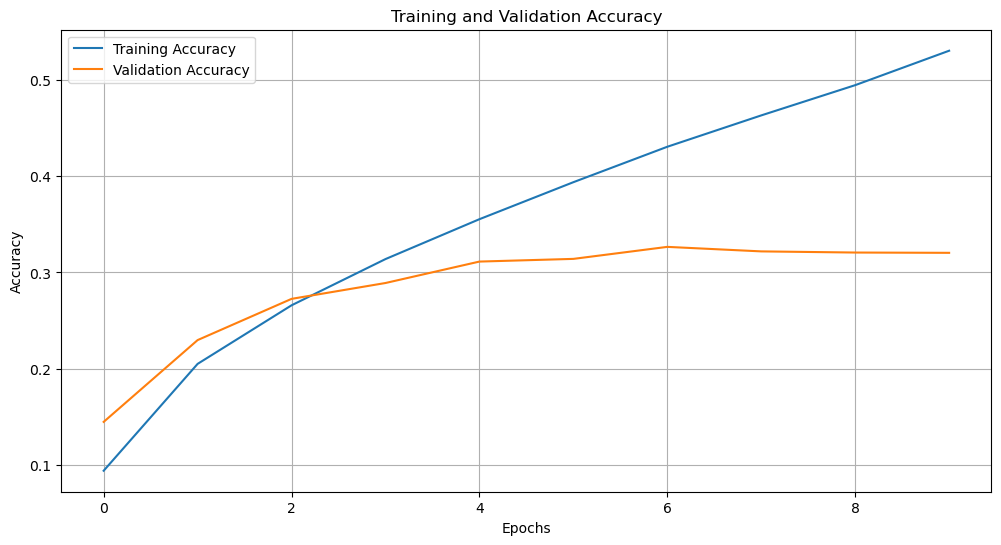

313/313 [==============================] - 2s 5ms/step


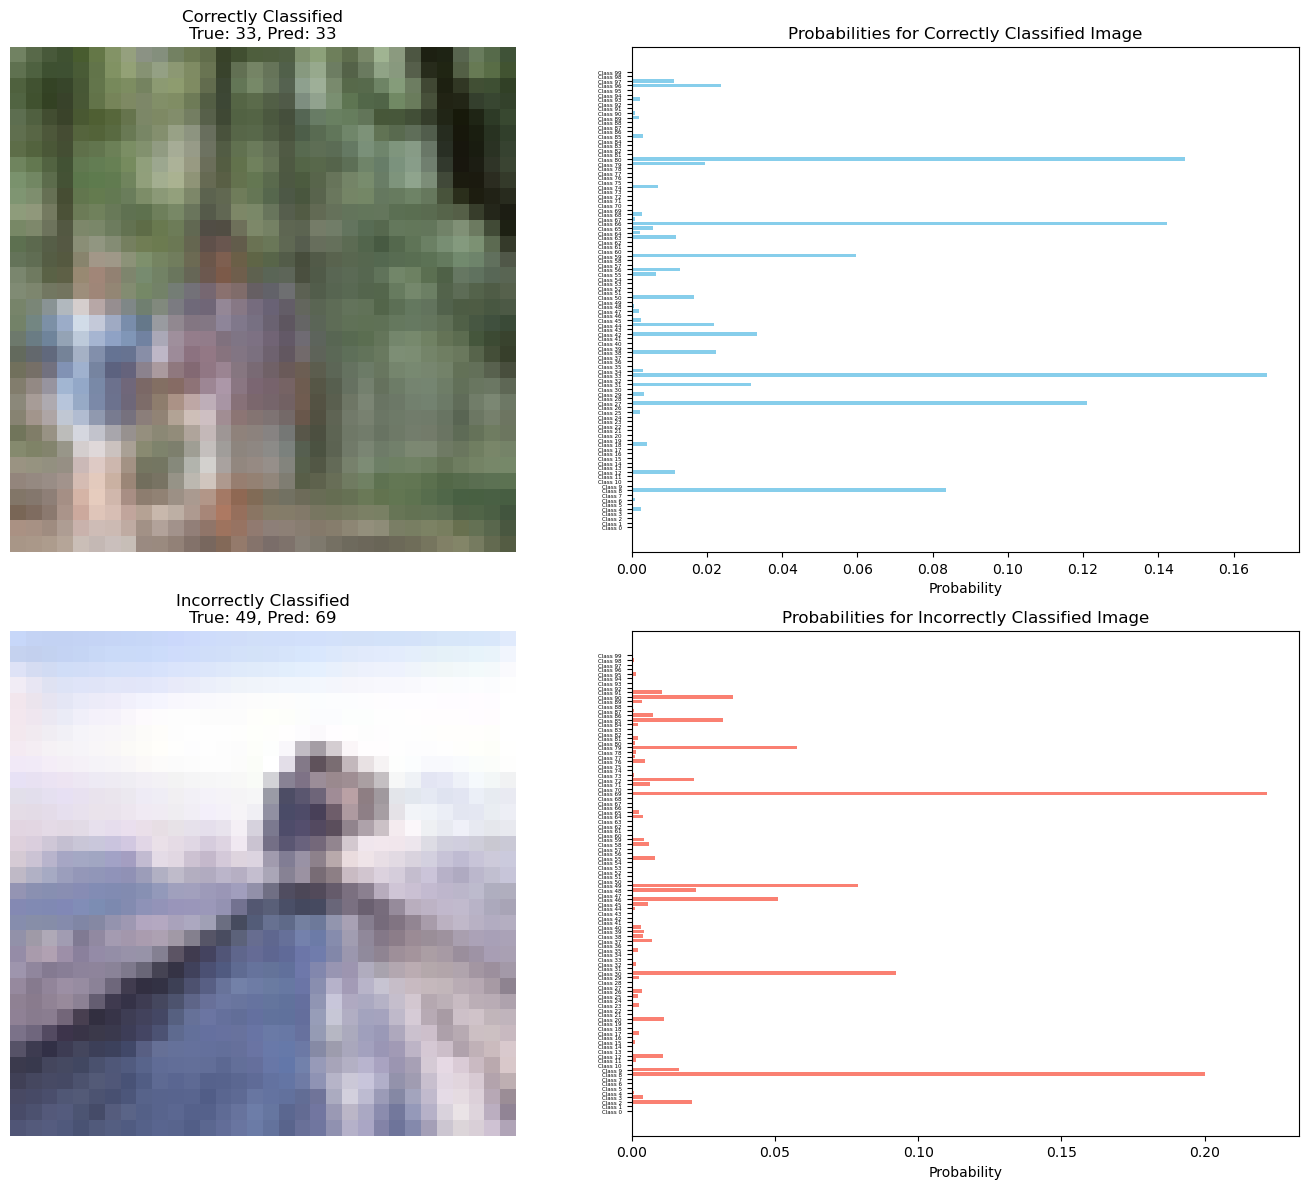

In [35]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Predict classes and probabilities for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=-1)  # Predicted class labels
y_true_classes = np.argmax(y_test, axis=-1)  # True class labels

# Find correctly classified and incorrectly classified images
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Select one correct and one incorrect image
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Get the predicted probabilities for each image
correct_image = x_test[correct_idx]
incorrect_image = x_test[incorrect_idx]

correct_probabilities = y_pred[correct_idx]
incorrect_probabilities = y_pred[incorrect_idx]

# Class names for CIFAR-100 in numerical order
class_names = [f'Class {i}' for i in range(100)]

# Create a list of indices from 0 to 99
indices = np.arange(100)

# Sort indices based on numerical order
sorted_indices = np.argsort(indices)

# Sort class names and probabilities according to sorted indices
sorted_class_names = [class_names[i] for i in sorted_indices]
sorted_correct_probabilities = correct_probabilities[sorted_indices]
sorted_incorrect_probabilities = incorrect_probabilities[sorted_indices]

# Create the plots
plt.figure(figsize=(14, 12))

# Plot the correct image and its probabilities
plt.subplot(2, 2, 1)
plt.imshow(correct_image)
plt.title(f'Correctly Classified\nTrue: {y_true_classes[correct_idx]}, Pred: {y_pred_classes[correct_idx]}')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.barh(sorted_class_names, sorted_correct_probabilities, color='skyblue')
plt.xlabel('Probability')
plt.title('Probabilities for Correctly Classified Image')
plt.gca().tick_params(axis='y', labelsize=4)  # Adjust font size for y-axis
plt.subplots_adjust(left=0.35)

# Plot the incorrect image and its probabilities
plt.subplot(2, 2, 3)
plt.imshow(incorrect_image)
plt.title(f'Incorrectly Classified\nTrue: {y_true_classes[incorrect_idx]}, Pred: {y_pred_classes[incorrect_idx]}')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.barh(sorted_class_names, sorted_incorrect_probabilities, color='salmon')
plt.xlabel('Probability')
plt.title('Probabilities for Incorrectly Classified Image')
plt.gca().tick_params(axis='y', labelsize=4)  # Adjust font size for y-axis
plt.subplots_adjust(left=0.2)

plt.tight_layout()
plt.show()


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

### Answer 4a:

**Data Augmentation:** <br> I applied data augmentation to enhance training which was an enhanced technique briefly discussed during the live sessions. This technique improves model robustness by generating additional training data from existing images through transformations like rotations, translations, and flips. It does so by artificially increasing the size of the training dataset and improve model generalization by applying random transformations to the training images.<br>
Hyperparameter Tuning: Data Augmentation requires Hyperparameter tunning. The values I chose were: 
- Rotation Range: Specifies the range for random rotations (20 degrees here).
- Width and Height Shift: Specifies the range for random shifts (20% of the image size).
- Shear and Zoom Range: Specifies the shear and zoom ranges for transformations (20% here).
- Horizontal Flip: Randomly flips images horizontally.
I chose 20 degrees for Rotation, Widht, Hight, Shear and Zoom rates after researching online and most articles agrreing that 20 degrees on this parameter provides enough variability for the model to generalize. That been said, these hyperparameters can be adjusted and tested to see if model training and validation improves

In [41]:
# Creating Enhanced Sequential model architecture equal to prior model
model2 = model

# Model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [42]:
# Adding data augmentation to check effects on model performance

from keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to the training data
datagen.fit(x_train)

# Compiling the model using CATEGORICAL CROSSENTROPY for loss function and ADAM optimizer with learning rate 0.001
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [43]:
# Re-training the enhanced model using the same number of epochs
history2 = model2.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(x_val, y_val),
    verbose=2
)


Epoch 1/10
1250/1250 - 137s - loss: 3.0179 - accuracy: 0.2587 - val_loss: 2.7962 - val_accuracy: 0.2996 - 137s/epoch - 110ms/step
Epoch 2/10
1250/1250 - 131s - loss: 2.9215 - accuracy: 0.2737 - val_loss: 2.7361 - val_accuracy: 0.3153 - 131s/epoch - 105ms/step
Epoch 3/10
1250/1250 - 133s - loss: 2.8547 - accuracy: 0.2837 - val_loss: 2.6747 - val_accuracy: 0.3319 - 133s/epoch - 106ms/step
Epoch 4/10
1250/1250 - 140s - loss: 2.7952 - accuracy: 0.2947 - val_loss: 2.6452 - val_accuracy: 0.3302 - 140s/epoch - 112ms/step
Epoch 5/10
1250/1250 - 135s - loss: 2.7619 - accuracy: 0.3011 - val_loss: 2.6033 - val_accuracy: 0.3383 - 135s/epoch - 108ms/step
Epoch 6/10
1250/1250 - 133s - loss: 2.7136 - accuracy: 0.3101 - val_loss: 2.6299 - val_accuracy: 0.3400 - 133s/epoch - 106ms/step
Epoch 7/10
1250/1250 - 130s - loss: 2.6856 - accuracy: 0.3192 - val_loss: 2.5700 - val_accuracy: 0.3502 - 130s/epoch - 104ms/step
Epoch 8/10
1250/1250 - 149s - loss: 2.6620 - accuracy: 0.3233 - val_loss: 2.5317 - val_acc

In [44]:
# Evaluate the enhanced model on the test set
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test, verbose=2)

# Report the accuracy
print(f'Accuracy: {test_accuracy2:.4f}')

# Report the loss
print(f'Loss: {test_loss2:.4f}')

# Predict classes for the test set
y_pred = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=-1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=-1)  # True class labels

# Calculate precision
precision2 = precision_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Precision: {precision2:.4f}')

313/313 - 1s - loss: 2.5266 - accuracy: 0.3611 - 1s/epoch - 4ms/step
Accuracy: 0.3611
Loss: 2.5266
313/313 [==============================] - 2s 5ms/step
Precision: 0.3778


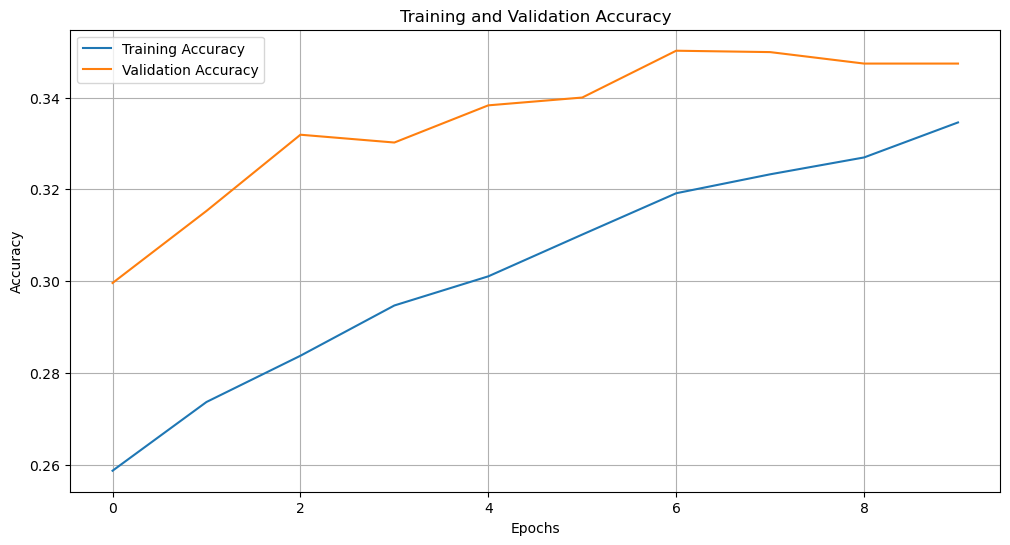

313/313 [==============================] - 1s 5ms/step


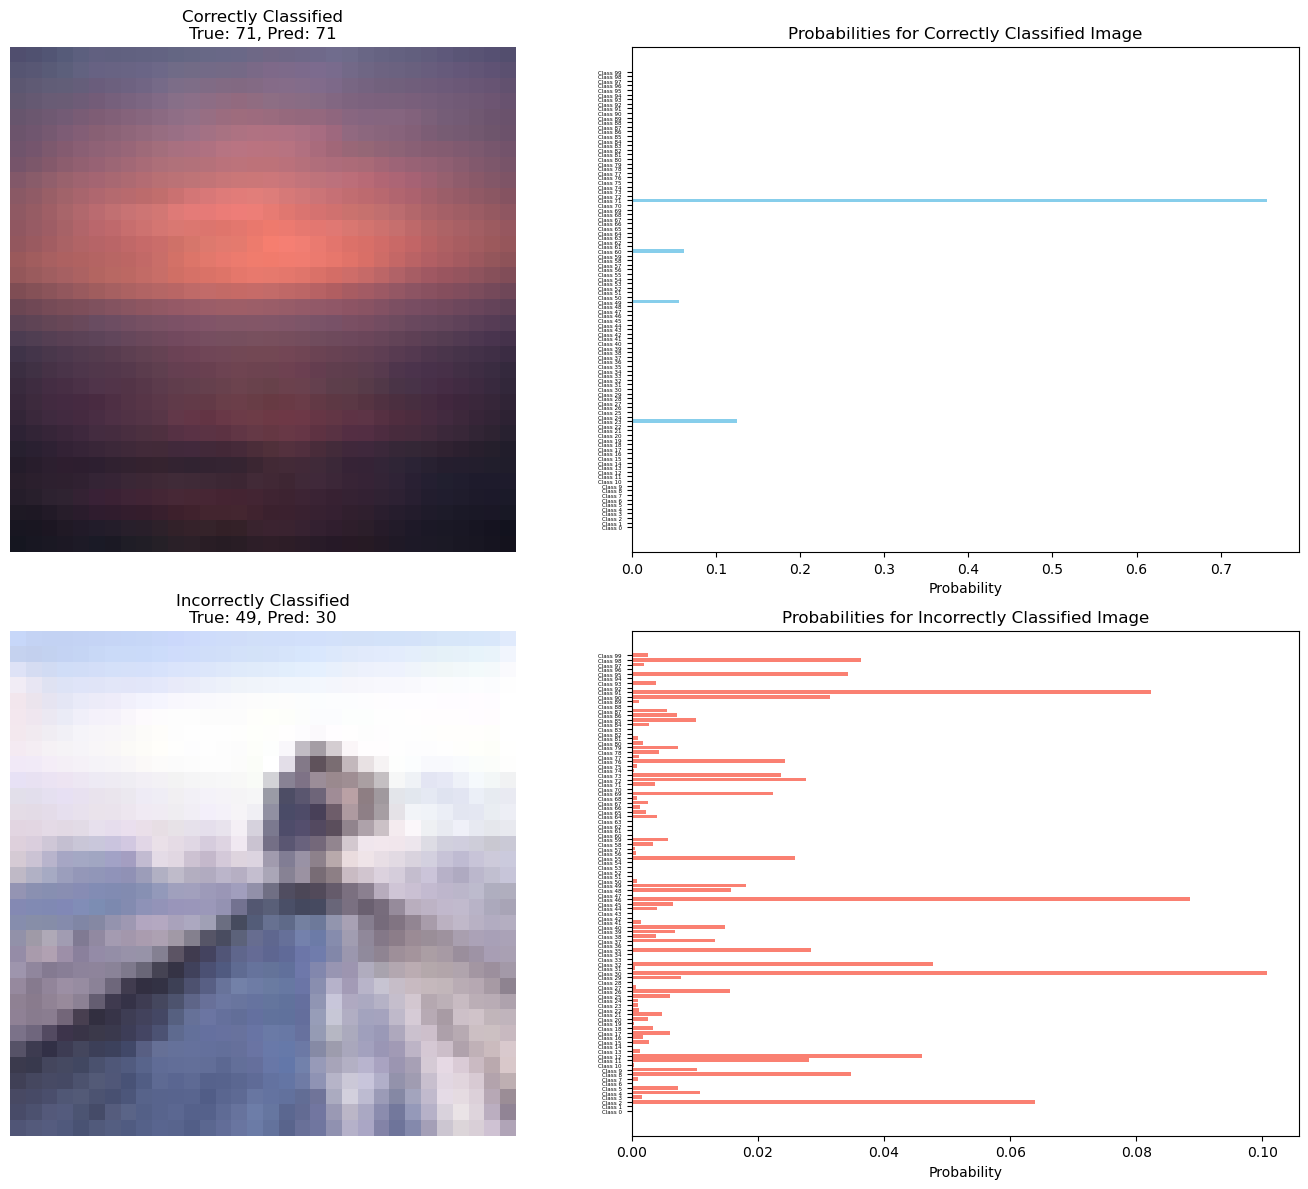

In [45]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.plot(history2.history['accuracy'], label='Training Accuracy')

# Plot validation accuracy
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Predict classes and probabilities for the test set
y_pred = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=-1)  # Predicted class labels
y_true_classes = np.argmax(y_test, axis=-1)  # True class labels

# Find correctly classified and incorrectly classified images
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Select one correct and one incorrect image
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Get the predicted probabilities for each image
correct_image = x_test[correct_idx]
incorrect_image = x_test[incorrect_idx]

correct_probabilities = y_pred[correct_idx]
incorrect_probabilities = y_pred[incorrect_idx]

# Class names for CIFAR-100 in numerical order
class_names = [f'Class {i}' for i in range(100)]

# Create a list of indices from 0 to 99
indices = np.arange(100)

# Sort indices based on numerical order
sorted_indices = np.argsort(indices)

# Sort class names and probabilities according to sorted indices
sorted_class_names = [class_names[i] for i in sorted_indices]
sorted_correct_probabilities = correct_probabilities[sorted_indices]
sorted_incorrect_probabilities = incorrect_probabilities[sorted_indices]

# Create the plots
plt.figure(figsize=(14, 12))

# Plot the correct image and its probabilities
plt.subplot(2, 2, 1)
plt.imshow(correct_image)
plt.title(f'Correctly Classified\nTrue: {y_true_classes[correct_idx]}, Pred: {y_pred_classes[correct_idx]}')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.barh(sorted_class_names, sorted_correct_probabilities, color='skyblue')
plt.xlabel('Probability')
plt.title('Probabilities for Correctly Classified Image')
plt.gca().tick_params(axis='y', labelsize=4)  # Adjust font size for y-axis
plt.subplots_adjust(left=0.35)

# Plot the incorrect image and its probabilities
plt.subplot(2, 2, 3)
plt.imshow(incorrect_image)
plt.title(f'Incorrectly Classified\nTrue: {y_true_classes[incorrect_idx]}, Pred: {y_pred_classes[incorrect_idx]}')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.barh(sorted_class_names, sorted_incorrect_probabilities, color='salmon')
plt.xlabel('Probability')
plt.title('Probabilities for Incorrectly Classified Image')
plt.gca().tick_params(axis='y', labelsize=4)  # Adjust font size for y-axis
plt.subplots_adjust(left=0.2)

plt.tight_layout()
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

### Answer 4c:

The enhanced model shows better performance in accuracy, loss and precision when compared to baseline. 
Although the performance improvement was moderate, the accuracy plot by epoch shows a more robust model. Initially, the enhanced model might be underfitting, meaning it hasn't learned the patterns in the training data very well yet.  As training progressed, the model started to learn and fit the training data better, hence the training accuracy increases. The fact that the validation accuracy is initially higher suggests that the model might have started with a slightly better generalization ability, or the initial random weights were more suited to the validation data. The reducing gap between training and validation accuracy indicates that the model is converging. The model is learning to perform better on the training data without sacrificing performance on the validation data, which means it is getting closer to an optimal fit as opposed to the baseline, where it was diverging.
Accuracy and other metrics are still low so there’s lots of room for improvement with techniques such as trying alternative architectures, data transformations and/or increase the availability of data, in addition to the data augmentation I applied.


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [X] Reviewed the PR description guidelines and adhered to them.
- [X] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.